# Preparation de data

Notre data contient des images du tableau, alors premierement on diviser notre data on deux 
data ca depend la position du la position du tableau dans les images. aprés on fait le crop pour
recevoir des nouveaux images

In [23]:
import os
import  glob
# récupérer le chemin du répertoire courant
path = os.getcwd()
#changer le chemin du repertoire
os.chdir("C:/Users/amine/Desktop/Master_S3/Machine learning/Projet_final")

In [24]:
compte=1
#une boucle pour parcourir toutes les fichiers du repertoire du data
for filename in glob.glob("data/*.bmp"):
    #lire chaque image
    img = Image.open(filename)
    #img = img.rotate(270)
    #recuperer le size des images
    w, h = img.size
     # (It will not change original image)
    #changer les padding des images crop(top,lef,bottom,right)
    image = img.crop((225, 430,2000, 1260))
    newsize = (w,h)
    image = image.resize(newsize)
    # Shows the image in image viewer
    # save a image using extension
    image = image.save("new_data_p1/"+"_"+str(compte)+".bmp")
    compte+=1

In [25]:
compte=28
for filename in glob.glob("data/*.bmp"):
    img = Image.open(filename)
    #img = img.rotate(270)
    w, h = img.size
     # (It will not change original image)
    image = img.crop((325, 230,2145, 1160))
    newsize = (w,h)
    image = image.resize(newsize)
    # Shows the image in image viewer
    # save a image using extension
    image = image.save("new_data_p1/"+"_"+str(compte)+".bmp")
    compte+=1

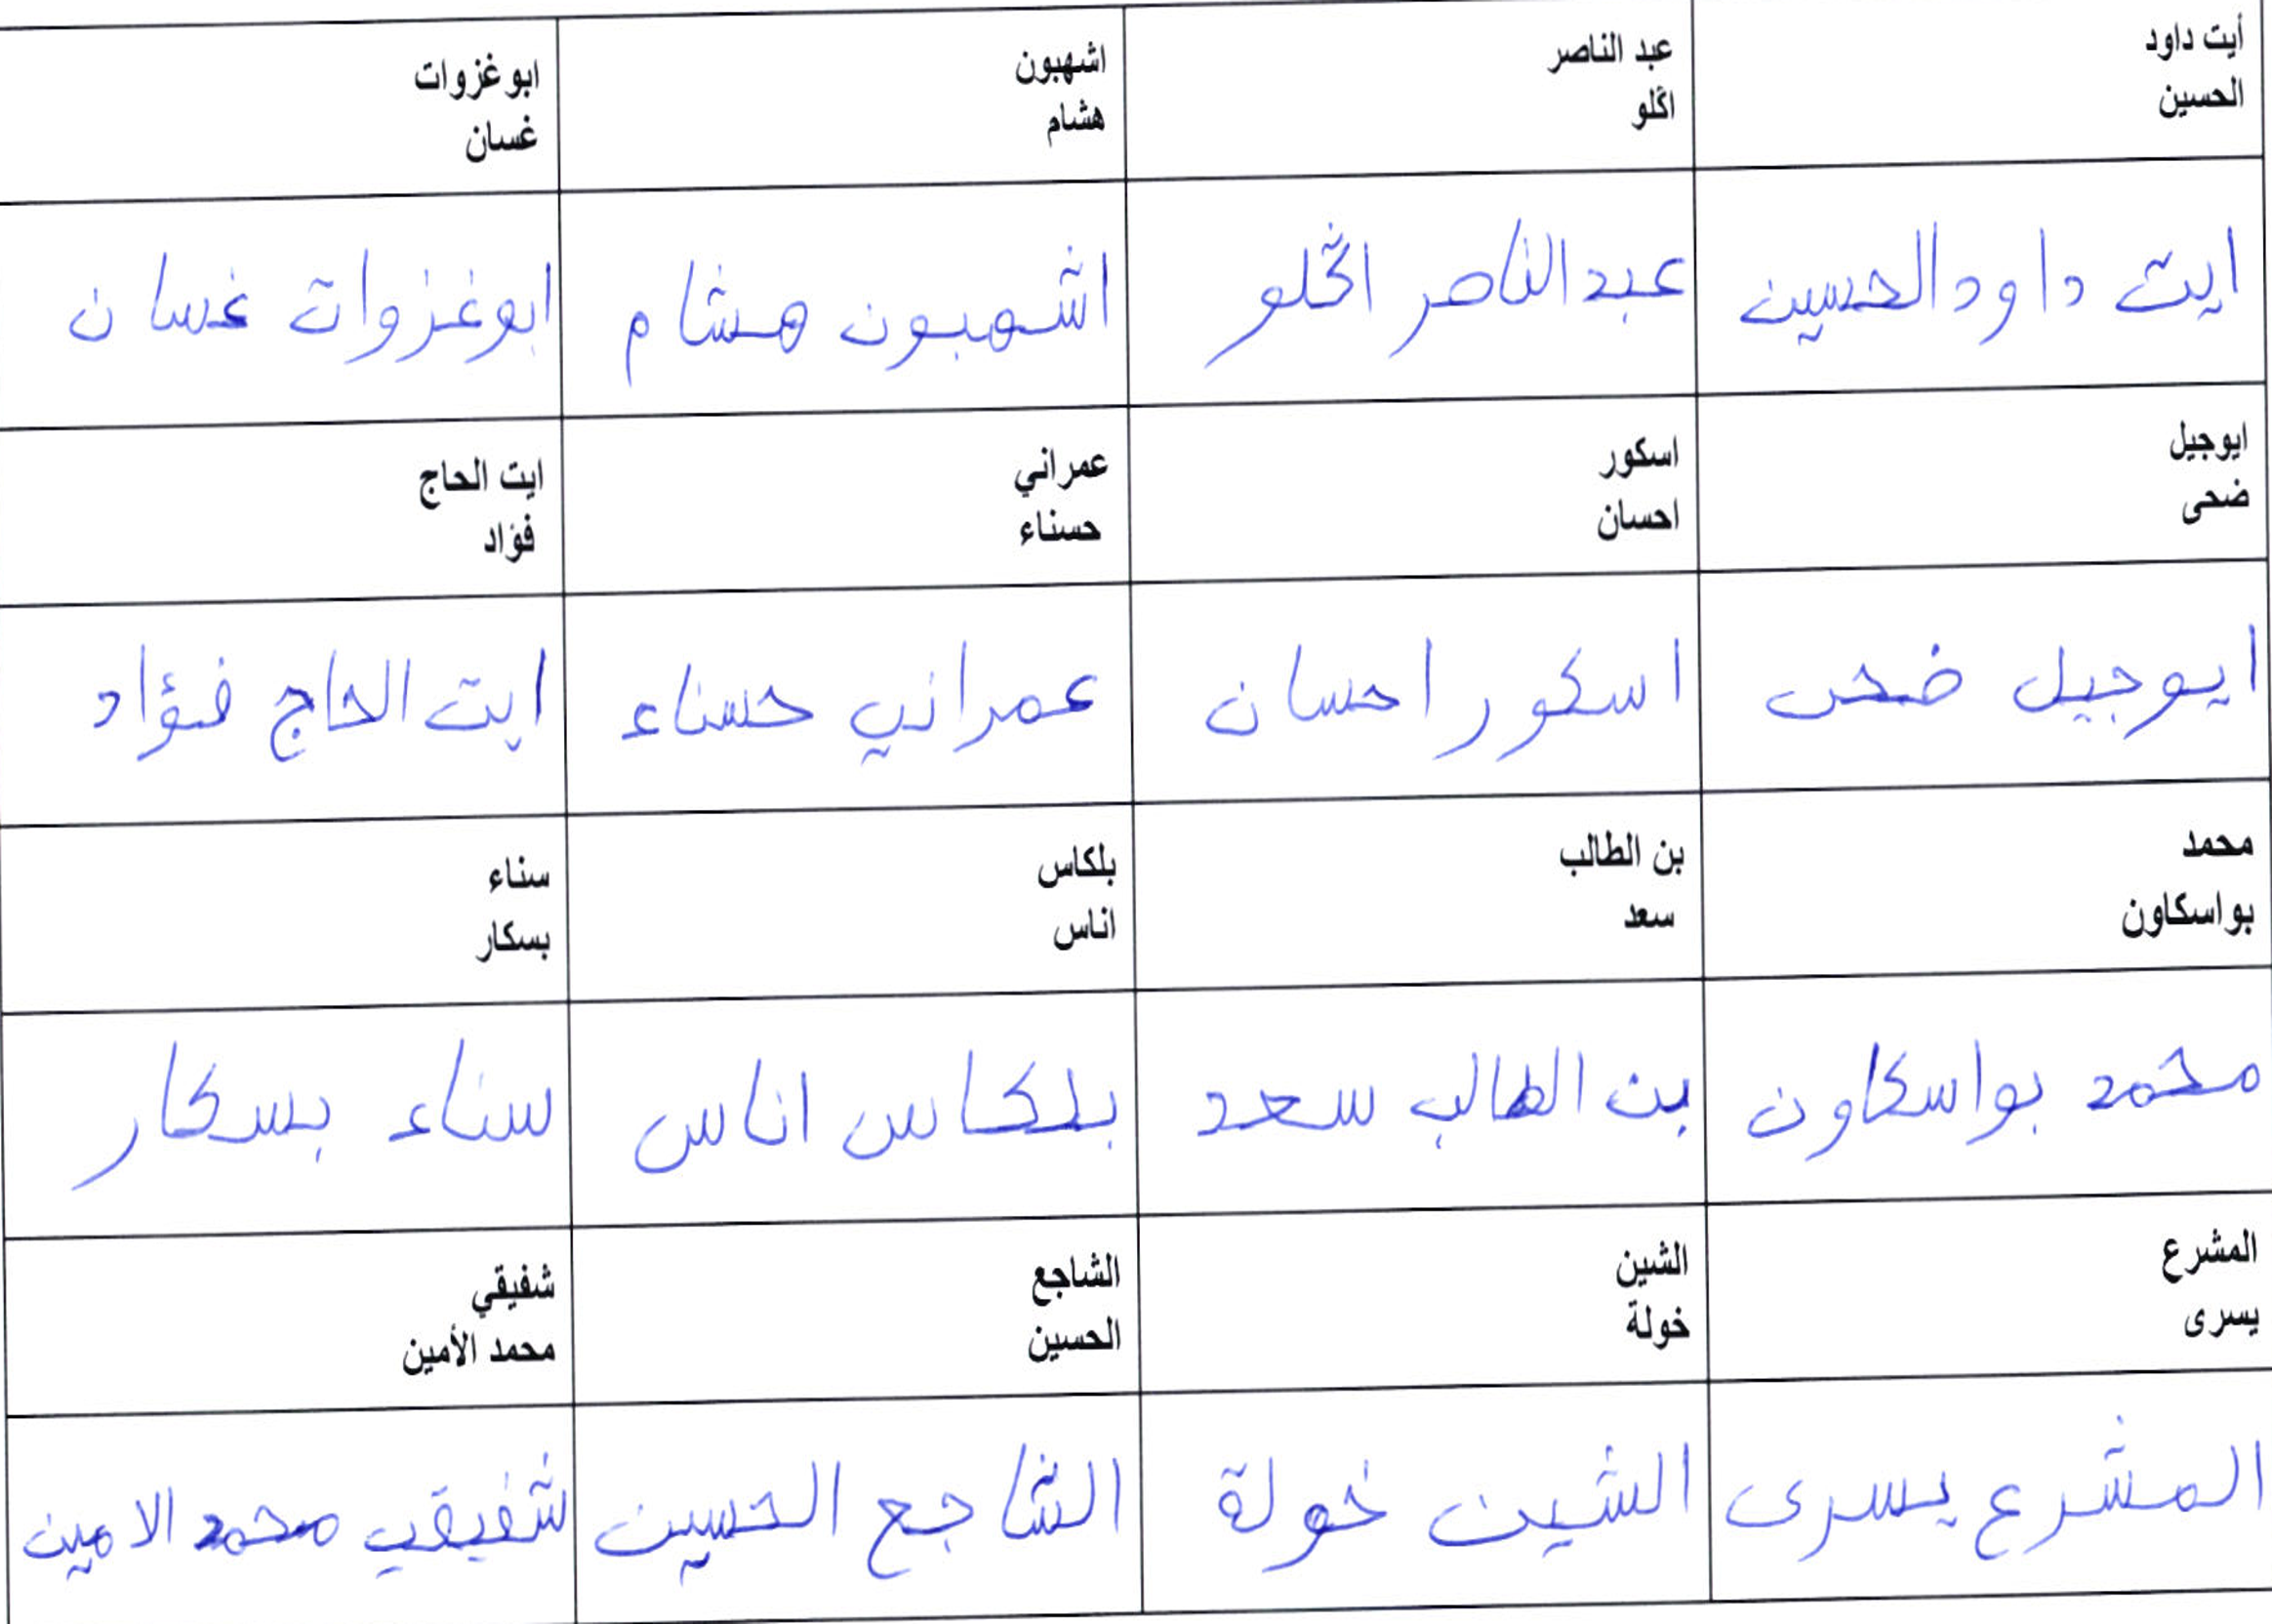

In [28]:
import cv2
from PIL import Image
img = Image.open('new_data\_1.bmp') 
img

In [29]:
#importer les bibliotheques necessaires surtout split_image
import os, glob
from split_image import split_image
from PIL import Image
for filename in glob.glob('new_data/*.bmp'):
    #split chaque images dans notre data en 32 nouveaux images
    split_image(filename, 8, 4, False, False)

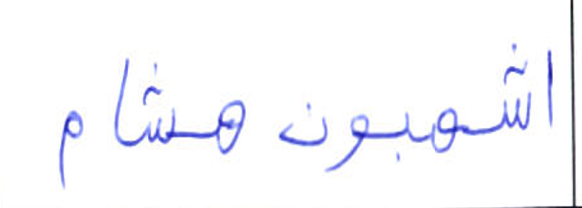

In [36]:
import cv2
from PIL import Image
img = Image.open('data_11\_1_1.bmp') 
img
img1 = Image.open('data_11\_1_5.bmp') 
img1

In [30]:
#supprimer le images qui sont creé par clavier 
mv=[0,1,2,3,8,9,10,11,16,17,18,19,24,25,26,27]
for i in range(1,55):
    for j in mv :
        path= "new_data_p1/_" + str(i) + "_" + str(j) +".bmp"
        if os.path.exists(path):#verifier l'existance des images 
            os.remove(path) #supression
        else:
            print("Impossible de supprimer le fichier car il n'existe pas")

In [31]:
from PIL import Image
#fonction pour convertir les images en blanc et noire
def complement(x):
    if x<128:
        x = 255
    else:
        x = 0
    return x
compte=1
#l'application de cette fonction sur toutes les images de notre dataset 
for filename in glob.glob('new_data_p1/*.bmp'):#parcourir les images de dataset et appliquer sur les 
    #la fonction complement 
    image1 = Image.open(filename).convert('L')
    impix = image1.load()
    for colonne in range(image1.size[0]):
        for ligne in range(image1.size[1]):
            impix[colonne,ligne] = complement(impix[colonne,ligne]) 
    #enregistrer les nouveaux images dans un autre dossier
    image1 = image1.save("blanc-noire/"+"_"+str(compte)+".bmp")
    compte+=1

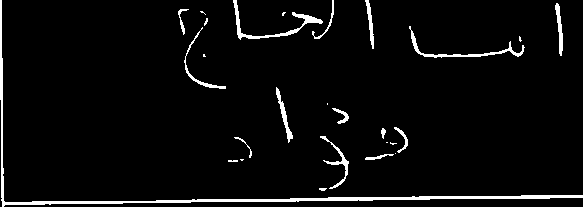

In [32]:
import cv2
from PIL import Image
img = Image.open('blanc-noire\_1.bmp')#lire l'image
img #afficher l'images

#segmantation manuelle des caractere :
dans cette etape on a utiliser une site web qui s'appelle spliter 

la reseize des images

In [39]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

la nettoiyage des images

In [40]:
def cleaned_image(image_path):
    image=cv2.imread(image_path)
    bg=np.zeros((32,32))
    image=trim(image)
    image=image_resize(image,height=28)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    hh, ww = bg.shape
    h, w = image_binary.shape
    yoff = round((hh-h)/2)
    xoff = round((ww-w)/2)
    if xoff<=0:
        image=image_resize(image,height=28,width=28)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        h, w = image_binary.shape
        yoff = round((hh-h)/2)
        xoff = round((ww-w)/2)
    result = bg.copy()
    result[yoff:yoff+h, xoff:xoff+w] = image_binary
    return result

la creation du dataset

In [41]:
import os
import glob
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
def create_dataset(input,output,name):
    for char in glob.iglob(input+'/*'):
        char_name=char.split('\\')[-1].lower()
        for type in glob.iglob(char+'/*'):
            type_name=type.split('\\')[-1].lower()
            i=0
            for image_path in glob.iglob(type+'/*'):
                create_directory(output)
                create_directory(output+'/'+char_name)
                create_directory(output+'/'+char_name+'/'+type_name)
                ext=image_path.split('\\')[-1].split('.')[1].lower()
                cv2.imwrite(output+'/'+char_name+'/'+type_name+'/'+name+'_'+str(i)+"_"+type_name+"."+ext,cleaned_image(image_path))
                i+=1

In [42]:
create_dataset(input='arabic_letters',output='mnist_arabic_images',name='ouakib_amine')

Covertir les images en tableau des pixels

In [251]:
import time
import pandas as pd
# tqdm for progress bars
from tqdm import tqdm
# Pillow Image Library
from PIL import Image
# Numpy module
import numpy as np

# A list for column names of csv
columnNames = list()
# A column for label
columnNames.append('label')
# Other pixels column
# replace 784 with your image size, here it is 28x28=784
# iterate and build headers
for i in range(784):
    pixel = str(i)
    columnNames.append(pixel)

# Create a Pandas dataframe for storing data
train_data = pd.DataFrame(columns = columnNames)

# calculates the total number of images in the dataset initially 0
num_images = 0

# iterate through every folder of the dataset
for folder in glob.glob("*"):
        for filename in glob.glob(folder +'/*'):
            img = Image.open(filename)
            # resize to 28x28, replace with your size
            img = img.resize((28, 28), Image.NEAREST)
            # load image  
            img.load()
            # create a numpy array for image pixels
            imgdata = np.asarray(img, dtype="int32")

            # temporary array to store pixel values
            data = []
            data.append(folder)
            for y in range(28):
                for x in range(28):
                    data.append(imgdata[x][y])

            # add the data row to training data dataframe
            train_data.loc[num_images] = data

            # increment the number of images
            num_images += 1

# write the dataframe to the CSV file
train_data.to_csv("train_converted.csv", index=False)

<ipython-input-251-8eec6b4a373d>:32: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((28, 28), Image.NEAREST)


In [1]:
import os
import  glob
# récupérer le chemin du répertoire courant
path = os.getcwd()
os.chdir("C:/Users/amine/Desktop/Master_S3/Machine learning/Projet_final")

In [2]:
os.getcwd()

'C:\\Users\\amine\\Desktop\\Master_S3\\Machine learning\\Projet_final'

In [3]:
import pandas as pd
data = pd.read_csv("data_letter_arabic.csv")

In [4]:
data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,ain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Seperate the target and independant variables
df_x=data.iloc[:,1:] #le variable X
df_y=data.iloc[:,0] # le variable y

In [6]:
data[data['label']=='ain_end']

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
22,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,ain_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
path = os.getcwd()
path

'C:\\Users\\amine\\Desktop\\Master_S3\\Machine learning\\Projet_final'

In [8]:
#Load other modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split #division de dataset
from sklearn.metrics import classification_report, confusion_matrix #pour generer la matrice de confusion
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [9]:
#fonction pour afficher une image d'apres les donneés qui sont en pixel
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

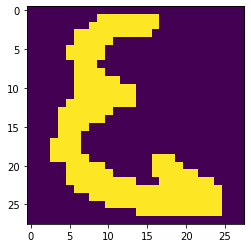

In [10]:
print_image(1, df_x)

# L’approche traditionnelle

In [10]:
#division de dataset en dux data pour train 80% et pour test 20% 
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size = 0.2, random_state = 21)

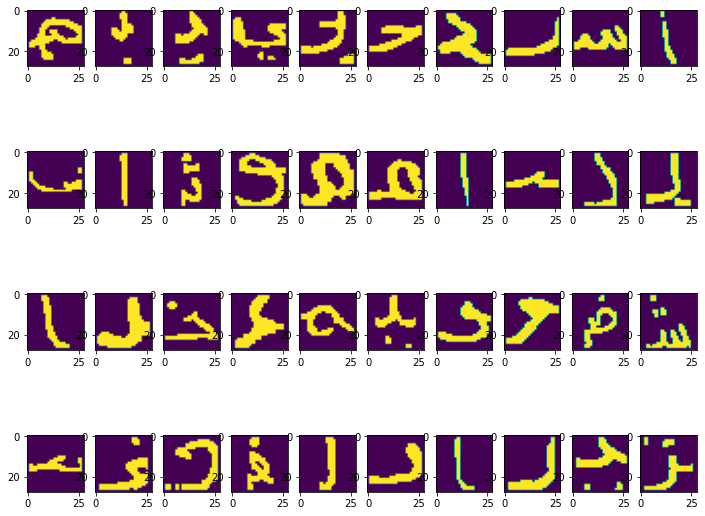

In [11]:
#affichage des images du test dataset 
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, X_test)

In [12]:
#affichage de la taille du X_train et X_test
print(X_train.shape)
print(X_test.shape)

(5913, 784)
(1479, 784)


In [13]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
pred=rf.predict(X_test)

In [15]:
print ("Classification Report")
print(classification_report(y_test,pred))

Classification Report
                  precision    recall  f1-score   support

             ain       1.00      0.40      0.57         5
         ain_end       1.00      0.29      0.44         7
      ain_middle       0.80      0.62      0.70        13
       ain_start       0.61      0.52      0.56        21
            alif       0.80      0.87      0.83       148
        alif_end       0.80      0.88      0.84       131
    alif_maqsora       0.00      0.00      0.00         4
         bae_end       0.71      0.86      0.77        14
      bae_middle       1.00      0.08      0.14        13
       bae_start       0.69      0.80      0.74        41
       dad_start       0.50      0.10      0.17        10
             dal       0.61      0.88      0.72        26
         dal_end       0.70      0.64      0.67        47
          fa_end       1.00      0.25      0.40         4
       fa_middle       0.75      0.55      0.63        11
        fa_start       0.50      0.17      0.25  

C:\Users\amine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,pred))

[[ 2  0  0 ...  1  0  0]
 [ 0  2  0 ...  4  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ... 11  5  0]
 [ 0  0  0 ...  0  0  3]]


ValueError: The number of FixedLocator locations (60), usually from a call to set_ticks, does not match the number of ticklabels (61).

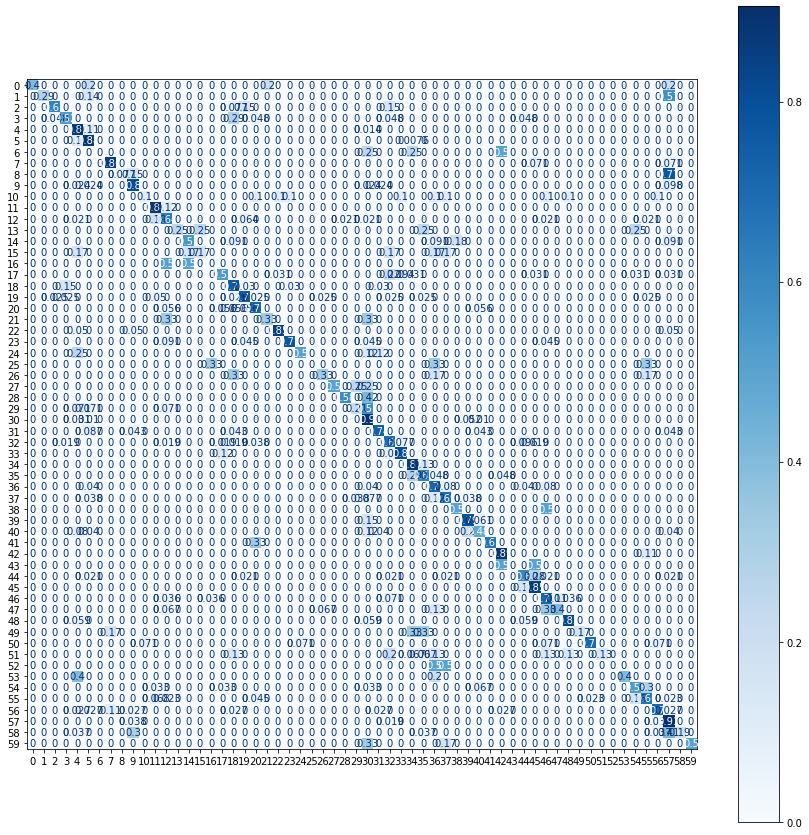

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
matrix = plot_confusion_matrix(rf,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

# random forest si (criterion='entropy')

In [65]:
#training random Forest
clf=RandomForestClassifier(n_estimators=100,
                       criterion='entropy', random_state=21)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [66]:
predect=clf.predict(X_test)

In [67]:
print ("Classification Report")
print(classification_report(y_test,predect))

Classification Report
                  precision    recall  f1-score   support

             ain       1.00      0.80      0.89         5
         ain_end       1.00      0.57      0.73         7
      ain_middle       0.67      0.46      0.55        13
       ain_start       0.61      0.52      0.56        21
            alif       0.80      0.87      0.83       148
        alif_end       0.80      0.87      0.83       131
    alif_maqsora       0.00      0.00      0.00         4
         bae_end       0.71      0.86      0.77        14
      bae_middle       0.67      0.15      0.25        13
       bae_start       0.65      0.76      0.70        41
       dad_start       0.00      0.00      0.00        10
             dal       0.68      0.96      0.79        26
         dal_end       0.76      0.60      0.67        47
          fa_end       1.00      0.50      0.67         4
       fa_middle       0.50      0.45      0.48        11
        fa_start       1.00      0.17      0.29  

C:\Users\amine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Validation croisée

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=3,random_state=1)
n_scores= cross_val_score(model,df_x,df_y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')

C:\Users\amine\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\amine\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\amine\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


In [14]:
from statistics import mean
print('accuracy: %.3f '%(mean(n_scores)))

accuracy: 0.728 
